In [1]:
import pandas as pd

# Define column names in the correct order
footfall_columns = [
    "National Park", "Month", "Year", "Footfall",
    "Concessioner Lodging", "NPS Campgrounds", "NPS Backcountry", "NPS Miscellaneous"
]

# Load the CSV without headers and assign column names
footfall_df = pd.read_csv("footfall-stats-california-national-parks.csv", header=None, names=footfall_columns)

# Display the first few rows to verify
footfall_df.head()


,National Park,Month,Year,Footfall,Concessioner Lodging,NPS Campgrounds,NPS Backcountry,NPS Miscellaneous
0,Channel Islands NP,Dec,2015,15134,0,0,223,432
1,Channel Islands NP,Nov,2015,19525,0,0,873,1980
2,Channel Islands NP,Oct,2015,22700,0,0,1972,2691
3,Channel Islands NP,Sep,2015,25782,0,0,3862,5062
4,Channel Islands NP,Aug,2015,36274,0,0,3238,5652


In [2]:
weather_df = pd.read_csv("combined_monthly_totals_sorted.csv")

weather_df.head()

,Year,Month,National Park,Temp Avg,Dew Point Avg,Humidity Avg,Wind Speed Avg,Pressure Avg,Precipitation Total
0,2015,1,Channel_Islands,55.367742,45.864516,73.909677,2.767742,30.080645,1.33
1,2015,2,Channel_Islands,57.810714,49.464286,77.132143,4.146429,30.007143,0.32
2,2015,3,Channel_Islands,61.190323,49.703226,70.480645,4.629032,29.993548,0.30
3,2015,4,Channel_Islands,60.483333,46.133333,63.280000,6.313333,29.923333,0.18
4,2015,5,Channel_Islands,59.293548,49.864516,72.274194,6.303226,29.922581,0.32


In [3]:
import pandas as pd

# Clean the National Park names in footfall_df
footfall_df["National Park"] = footfall_df["National Park"].str.replace(" NP", "", regex=False)

# Clean the National Park names in weather_df by replacing "_" with spaces
weather_df["National Park"] = weather_df["National Park"].str.replace("_", " ")


# Month mapping from abbreviated names to numbers
month_mapping = {
    "Jan": 1, "Feb": 2, "Mar": 3, "Apr": 4, "May": 5, "Jun": 6,
    "Jul": 7, "Aug": 8, "Sep": 9, "Oct": 10, "Nov": 11, "Dec": 12
}

footfall_df["Month"] = footfall_df["Month"].map(month_mapping)

# Merge the DataFrames on NP, Year, and Month
merged_df = footfall_df.merge(weather_df, on=["National Park", "Year", "Month"], how="inner")

# Display the first few rows to verify
print(merged_df.head())
print(len(merged_df))

     National Park  Month  Year  Footfall  Concessioner Lodging  \
0  Channel Islands     12  2015     15134                     0   
1  Channel Islands     11  2015     19525                     0   
2  Channel Islands     10  2015     22700                     0   
3  Channel Islands      9  2015     25782                     0   
4  Channel Islands      8  2015     36274                     0   

   NPS Campgrounds  NPS Backcountry  NPS Miscellaneous   Temp Avg  \
0                0              223                432  53.706452   
1                0              873               1980  57.120000   
2                0             1972               2691  69.835484   
3                0             3862               5062  71.536667   
4                0             3238               5652  70.709677   

   Dew Point Avg  Humidity Avg  Wind Speed Avg  Pressure Avg  \
0      37.754839     57.612903        5.612903     30.035484   
1      38.836667     54.216667        4.810000     29.

Month                  -0.005689
Year                   -0.020433
Footfall                1.000000
Concessioner Lodging    0.774536
NPS Campgrounds         0.887323
NPS Backcountry         0.734550
NPS Miscellaneous       0.519648
Temp Avg                0.352925
Dew Point Avg          -0.106815
Humidity Avg           -0.449981
Wind Speed Avg          0.083592
Pressure Avg           -0.123053
Precipitation Total    -0.222818
Name: Footfall, dtype: float64


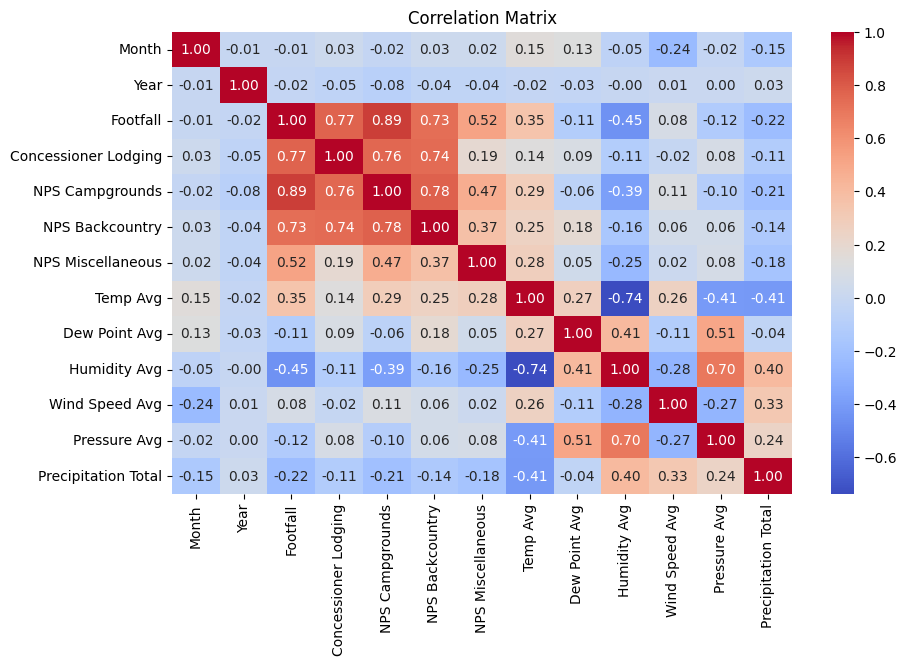

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting only numeric columns (excluding non-numeric ones like 'National Park')
numeric_cols = merged_df.select_dtypes(include=["number"])

# Compute the correlation matrix
correlation_matrix = numeric_cols.corr()

# Display correlation of Footfall with other variables
print(correlation_matrix["Footfall"])

# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


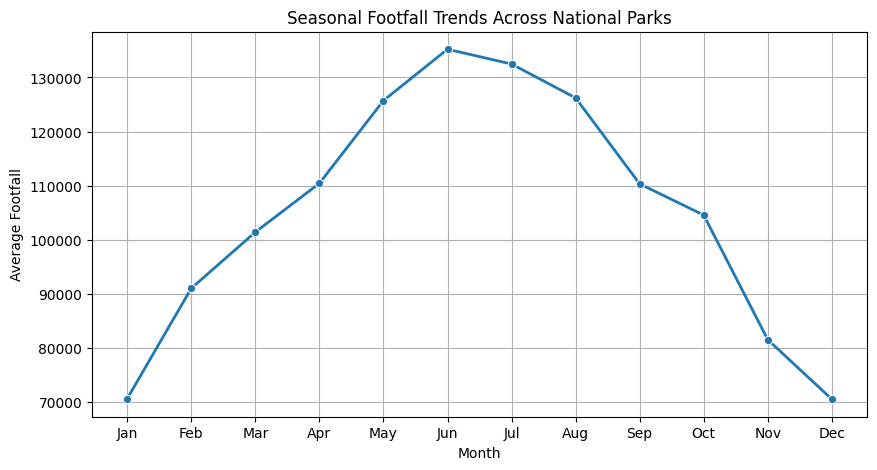

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate footfall by month
monthly_trends = merged_df.groupby("Month")["Footfall"].mean()

# Plot the seasonal trend
plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_trends.index, y=monthly_trends.values, marker="o", linewidth=2)

# Formatting
plt.xticks(ticks=range(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun",
                                       "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.xlabel("Month")
plt.ylabel("Average Footfall")
plt.title("Seasonal Footfall Trends Across National Parks")
plt.grid(True)
plt.show()


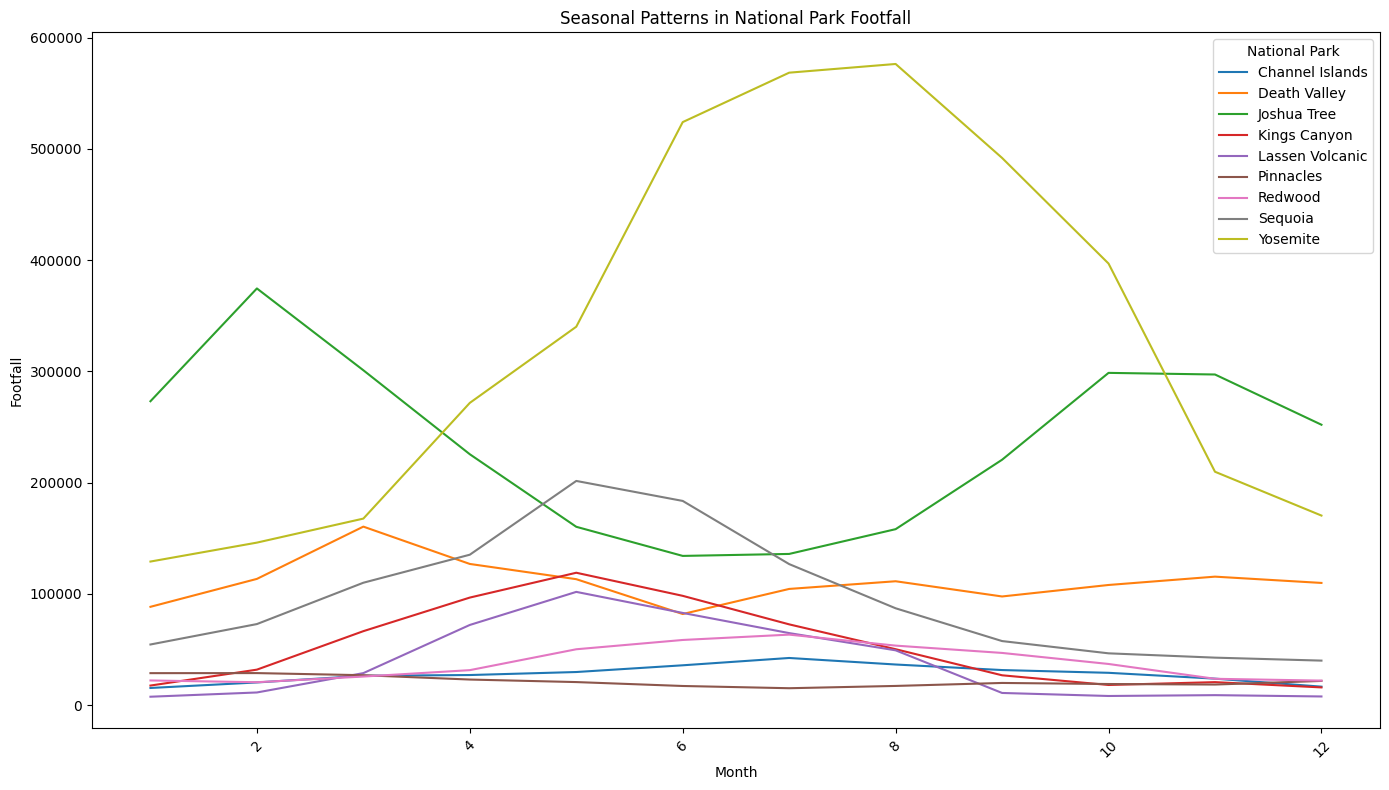

In [9]:
# Analyze if there's any seasonal pattern in footfall and its relation to species
seasonal_footfall = footfall_df.groupby(['National Park', 'Month'])['Footfall'].mean().reset_index()

# Convert month abbreviations to numbers for proper ordering
month_order = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 
               'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
seasonal_footfall['Month_Num'] = seasonal_footfall['Month'].map(month_order)
seasonal_footfall = seasonal_footfall.sort_values(['National Park', 'Month_Num'])

# Plot seasonal patterns for each park
plt.figure(figsize=(14, 8))
sns.lineplot(x='Month', y='Footfall', hue='National Park', 
             data=seasonal_footfall.sort_values('Month_Num'))
plt.title('Seasonal Patterns in National Park Footfall')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
import geopandas as gpd
import folium
from folium.plugins import HeatMap

park_coords = {
    "Yosemite": (37.8651, -119.5383),
    "Sequoia": (36.4864, -118.5658),
    "Kings Canyon": (36.8879, -118.5551),
    "Joshua Tree": (33.8734, -115.9010),
    "Death Valley": (36.5054, -117.0794),
    "Lassen Volcanic": (40.4977, -121.4208),
    "Redwood": (41.2132, -124.0046),
    "Pinnacles": (36.4906, -121.1825),
    "Channel Islands": (34.0069, -119.7785)
}

# Convert park dictionary to DataFrame
coords_df = pd.DataFrame(park_coords.items(), columns=["National Park", "Coordinates"])
coords_df["Latitude"] = coords_df["Coordinates"].apply(lambda x: x[0])
coords_df["Longitude"] = coords_df["Coordinates"].apply(lambda x: x[1])
coords_df.drop(columns=["Coordinates"], inplace=True)

# Merge footfall data with coordinates
footfall_map_df = merged_df.groupby("National Park")["Footfall"].sum().reset_index()
footfall_map_df = footfall_map_df.merge(coords_df, on="National Park", how="left")

# Create a folium map centered around California
california_map = folium.Map(location=[37.5, -119.5], zoom_start=6)

# Add heatmap layer
heat_data = list(zip(footfall_map_df["Latitude"], footfall_map_df["Longitude"], footfall_map_df["Footfall"]))
HeatMap(heat_data, radius=25, blur=15).add_to(california_map)

# Show map
california_map
